In [81]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from sklearn.datasets import load_boston
sns.set_style('whitegrid')

from sklearn.model_selection import train_test_split

In [15]:
data = load_boston()

In [16]:
dir(data)

['DESCR', 'data', 'feature_names', 'filename', 'target']

In [17]:
data.keys()

dict_keys(['data', 'target', 'feature_names', 'DESCR', 'filename'])

In [18]:
df = pd.DataFrame(data['data'],columns=data['feature_names'])

In [19]:
df['PRICE'] = data['target']

In [20]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
CRIM       506 non-null float64
ZN         506 non-null float64
INDUS      506 non-null float64
CHAS       506 non-null float64
NOX        506 non-null float64
RM         506 non-null float64
AGE        506 non-null float64
DIS        506 non-null float64
RAD        506 non-null float64
TAX        506 non-null float64
PTRATIO    506 non-null float64
B          506 non-null float64
LSTAT      506 non-null float64
PRICE      506 non-null float64
dtypes: float64(14)
memory usage: 55.4 KB


In [21]:
pd.isnull(df).any()

CRIM       False
ZN         False
INDUS      False
CHAS       False
NOX        False
RM         False
AGE        False
DIS        False
RAD        False
TAX        False
PTRATIO    False
B          False
LSTAT      False
PRICE      False
dtype: bool

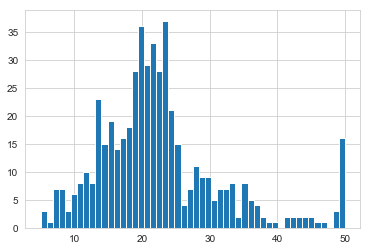

In [22]:
df['PRICE'].hist(bins=50)

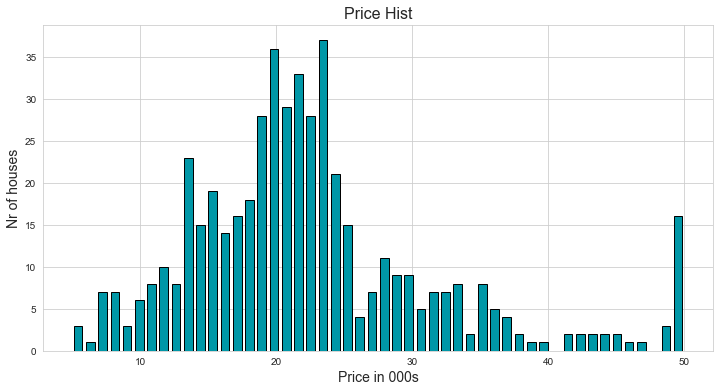

In [23]:
plt.figure(figsize=(12,6))
plt.hist(df['PRICE'],bins=50,edgecolor='black',color='#0097A7',rwidth=0.7)
plt.xlabel('Price in 000s',fontsize=14)
plt.ylabel('Nr of houses',fontsize=14)
plt.title('Price Hist',fontsize=16)
plt.show()

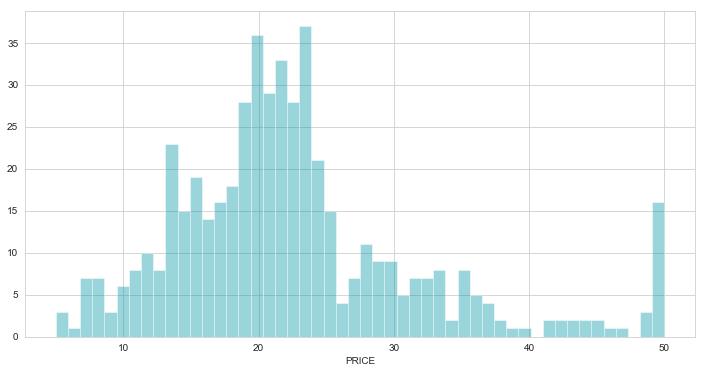

In [24]:
plt.figure(figsize=(12,6))

sns.distplot((df['PRICE']),kde=False,bins=50,color='#0097A7')
plt.show()

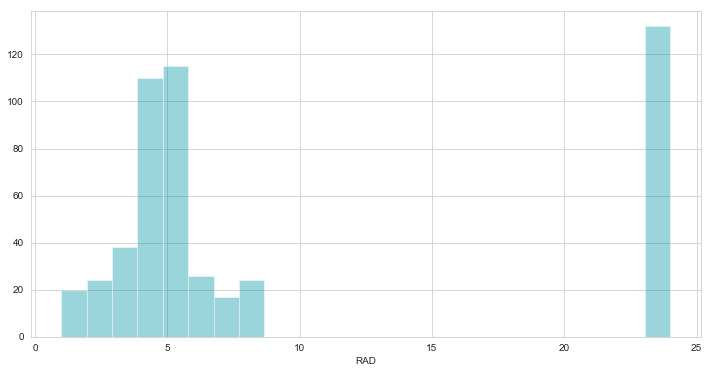

In [25]:
plt.figure(figsize=(12,6))

sns.distplot((df['RAD']),kde=False,bins=24,color='#0097A7')
plt.show()

In [26]:
frequency = df['RAD'].value_counts()

In [27]:
frequency

24.0    132
5.0     115
4.0     110
3.0      38
6.0      26
8.0      24
2.0      24
1.0      20
7.0      17
Name: RAD, dtype: int64

In [28]:
#frequency.index
#frequency.axes[0]

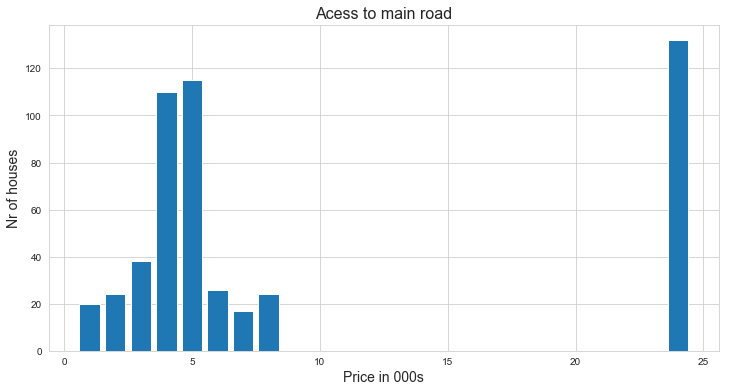

In [29]:
plt.figure(figsize=(12,6))
plt.bar(frequency.index,height=frequency)

#plt.hist(df['PRICE'],bins=50,edgecolor='black',color='#0097A7')
plt.xlabel('Price in 000s',fontsize=14)
plt.ylabel('Nr of houses',fontsize=14)
plt.title('Acess to main road',fontsize=16)
plt.show()

## Descriptive stastics

In [30]:
df.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,PRICE
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


In [31]:
df['PRICE'].corr(df['RM'])

0.6953599470715394

In [32]:
df.corr()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,PRICE
CRIM,1.000000,-0.200469,0.406583,-0.055892,0.420972,-0.219247,0.352734,-0.379670,0.625505,0.582764,0.289946,-0.385064,0.455621,-0.388305
ZN,-0.200469,1.000000,-0.533828,-0.042697,-0.516604,0.311991,-0.569537,0.664408,-0.311948,-0.314563,-0.391679,0.175520,-0.412995,0.360445
INDUS,0.406583,-0.533828,1.000000,0.062938,0.763651,-0.391676,0.644779,-0.708027,0.595129,0.720760,0.383248,-0.356977,0.603800,-0.483725
CHAS,-0.055892,-0.042697,0.062938,1.000000,0.091203,0.091251,0.086518,-0.099176,-0.007368,-0.035587,-0.121515,0.048788,-0.053929,0.175260
NOX,0.420972,-0.516604,0.763651,0.091203,1.000000,-0.302188,0.731470,-0.769230,0.611441,0.668023,0.188933,-0.380051,0.590879,-0.427321
RM,-0.219247,0.311991,-0.391676,0.091251,-0.302188,1.000000,-0.240265,0.205246,-0.209847,-0.292048,-0.355501,0.128069,-0.613808,0.695360
AGE,0.352734,-0.569537,0.644779,0.086518,0.731470,-0.240265,1.000000,-0.747881,0.456022,0.506456,0.261515,-0.273534,0.602339,-0.376955
DIS,-0.379670,0.664408,-0.708027,-0.099176,-0.769230,0.205246,-0.747881,1.000000,-0.494588,-0.534432,-0.232471,0.291512,-0.496996,0.249929
RAD,0.625505,-0.311948,0.595129,-0.007368,0.611441,-0.209847,0.456022,-0.494588,1.000000,0.910228,0.464741,-0.444413,0.488676,-0.381626
TAX,0.582764,-0.314563,0.720760,-0.035587,0.668023,-0.292048,0.506456,-0.534432,0.910228,1.000000,0.460853,-0.441808,0.543993,-0.468536


In [33]:
df.max()

CRIM        88.9762
ZN         100.0000
INDUS       27.7400
CHAS         1.0000
NOX          0.8710
RM           8.7800
AGE        100.0000
DIS         12.1265
RAD         24.0000
TAX        711.0000
PTRATIO     22.0000
B          396.9000
LSTAT       37.9700
PRICE       50.0000
dtype: float64

In [34]:
df.min()

CRIM         0.00632
ZN           0.00000
INDUS        0.46000
CHAS         0.00000
NOX          0.38500
RM           3.56100
AGE          2.90000
DIS          1.12960
RAD          1.00000
TAX        187.00000
PTRATIO     12.60000
B            0.32000
LSTAT        1.73000
PRICE        5.00000
dtype: float64

## Correlation

In [37]:
df['PRICE'].corr(df['LSTAT'])

-0.7376627261740151

Index(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX',
       'PTRATIO', 'B', 'LSTAT', 'PRICE'],
      dtype='object')

In [39]:
df.corr()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,PRICE
CRIM,1.000000,-0.200469,0.406583,-0.055892,0.420972,-0.219247,0.352734,-0.379670,0.625505,0.582764,0.289946,-0.385064,0.455621,-0.388305
ZN,-0.200469,1.000000,-0.533828,-0.042697,-0.516604,0.311991,-0.569537,0.664408,-0.311948,-0.314563,-0.391679,0.175520,-0.412995,0.360445
INDUS,0.406583,-0.533828,1.000000,0.062938,0.763651,-0.391676,0.644779,-0.708027,0.595129,0.720760,0.383248,-0.356977,0.603800,-0.483725
CHAS,-0.055892,-0.042697,0.062938,1.000000,0.091203,0.091251,0.086518,-0.099176,-0.007368,-0.035587,-0.121515,0.048788,-0.053929,0.175260
NOX,0.420972,-0.516604,0.763651,0.091203,1.000000,-0.302188,0.731470,-0.769230,0.611441,0.668023,0.188933,-0.380051,0.590879,-0.427321
RM,-0.219247,0.311991,-0.391676,0.091251,-0.302188,1.000000,-0.240265,0.205246,-0.209847,-0.292048,-0.355501,0.128069,-0.613808,0.695360
AGE,0.352734,-0.569537,0.644779,0.086518,0.731470,-0.240265,1.000000,-0.747881,0.456022,0.506456,0.261515,-0.273534,0.602339,-0.376955
DIS,-0.379670,0.664408,-0.708027,-0.099176,-0.769230,0.205246,-0.747881,1.000000,-0.494588,-0.534432,-0.232471,0.291512,-0.496996,0.249929
RAD,0.625505,-0.311948,0.595129,-0.007368,0.611441,-0.209847,0.456022,-0.494588,1.000000,0.910228,0.464741,-0.444413,0.488676,-0.381626
TAX,0.582764,-0.314563,0.720760,-0.035587,0.668023,-0.292048,0.506456,-0.534432,0.910228,1.000000,0.460853,-0.441808,0.543993,-0.468536


In [49]:
#mask = np.tril(df.corr())
#mask

In [52]:
mask = np.zeros_like(df.corr())
triangle_indices = np.triu_indices_from(mask)
mask[triangle_indices]=True
mask
#sns.heatmap(mask)

array([[1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.],
       [0., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.],
       [0., 0., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.],
       [0., 0., 0., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.],
       [0., 0., 0., 0., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.],
       [0., 0., 0., 0., 0., 1., 1., 1., 1., 1., 1., 1., 1., 1.],
       [0., 0., 0., 0., 0., 0., 1., 1., 1., 1., 1., 1., 1., 1.],
       [0., 0., 0., 0., 0., 0., 0., 1., 1., 1., 1., 1., 1., 1.],
       [0., 0., 0., 0., 0., 0., 0., 0., 1., 1., 1., 1., 1., 1.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 1., 1., 1., 1.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 1., 1., 1.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 1., 1.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 1.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1.]])

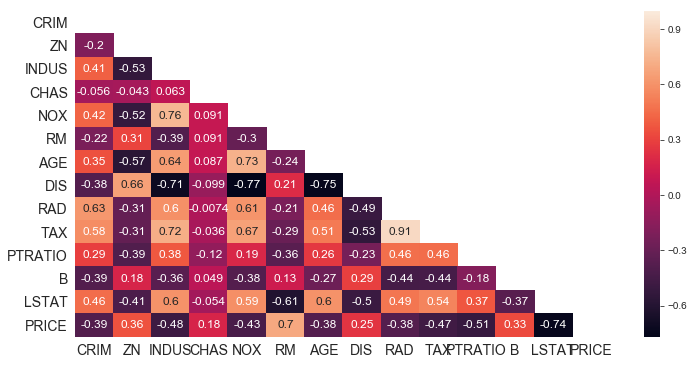

In [59]:
plt.figure(figsize=(12,6))
sns.heatmap(df.corr(),mask=mask,annot=True,annot_kws={'size':12})
sns.set_style('white')
plt.yticks(fontsize=14)
plt.xticks(fontsize=14)
plt.show()

In [58]:
#mask = np.tril(np.ones_like(df.corr())).T
#mask

<Figure size 864x432 with 0 Axes>

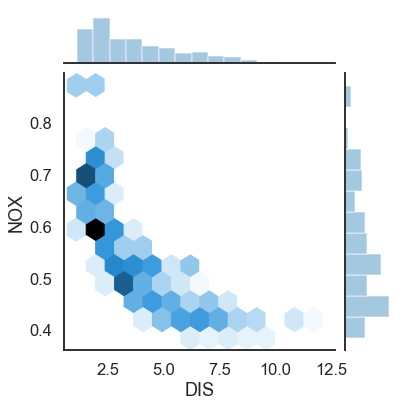

In [63]:
plt.figure(figsize=(12,6))
sns.set_context('talk')
sns.jointplot(x='DIS',y = 'NOX', data=df,kind='hex')
plt.show()

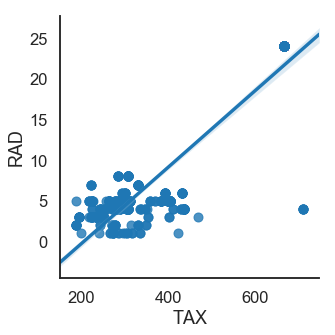

In [70]:
sns.lmplot(x='TAX',y='RAD',data=df)
plt.show()

In [77]:
rm_tgt_corr = round(df['PRICE'].corr(df['RM']),3)
rm_tgt_corr

0.695

Text(0.5, 0, 'MEADIAN--no of rooms  ')

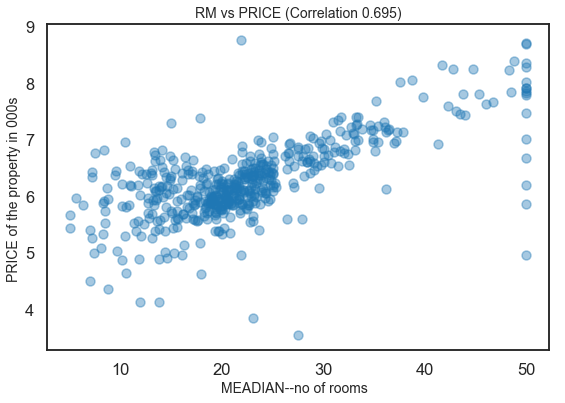

In [80]:
plt.figure(figsize=(9,6))
plt.scatter(df['PRICE'],df['RM'],alpha=0.4,s=80)
plt.title(f'RM vs PRICE (Correlation {rm_tgt_corr})',fontsize=14)
plt.ylabel('PRICE of the property in 000s ',fontsize=14)
plt.xlabel('MEADIAN--no of rooms  ',fontsize=14)

In [112]:
prices = df['PRICE']
features = df.drop('PRICE',axis=1)

X_train, X_test, y_train, y_test = train_test_split(
    features, prices, test_size=0.2, random_state=10)

In [113]:
X_test.shape

(102, 13)

## Multivariable Regression

In [114]:
from sklearn.linear_model import LinearRegression

In [115]:
regr = LinearRegression()
regr.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [116]:
print('Training data r-squared: ',regr.score(X_train,y_train))
print('Test data r-squared: ',regr.score(X_test,y_test))

print('Intercept',regr.intercept_)

Training data r-squared:  0.750121534530608
Test data r-squared:  0.6709339839115631
Intercept 36.533051382824624


In [117]:
normal_coef = pd.DataFrame(data=regr.coef_,index=X_train.columns,columns=['coef'])
normal_coef

,coef
CRIM,-0.128181
ZN,0.063198
INDUS,-0.007576
CHAS,1.974515
NOX,-16.271989
RM,3.108456
AGE,0.016292
DIS,-1.483014
RAD,0.303988
TAX,-0.012082


In [91]:
df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,PRICE
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


In [92]:
df['PRICE'].skew()

1.1080984082549072

In [94]:
y_log = np.log(df['PRICE'])
y_log.tail()

501    3.109061
502    3.025291
503    3.173878
504    3.091042
505    2.476538
Name: PRICE, dtype: float64

In [95]:
y_log.skew()

-0.33032129530987864

<Figure size 648x432 with 0 Axes>

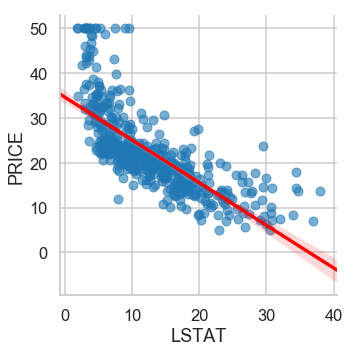

In [104]:
plt.figure(figsize=(9,6))
sns.lmplot(x='LSTAT',y='PRICE',data=(df),line_kws={'color':'red'},
          scatter_kws={'alpha':0.6})
plt.show()

<Figure size 648x432 with 0 Axes>

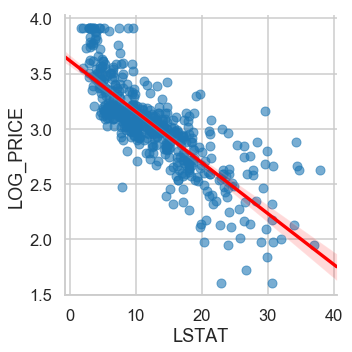

In [105]:
transformed_data = features
transformed_data['LOG_PRICE'] = y_log

plt.figure(figsize=(9,6))
sns.lmplot(x='LSTAT',y='LOG_PRICE',data=(transformed_data),
           line_kws={'color':'red'},
          scatter_kws={'alpha':0.6})
plt.show()

## Regression with Transformed data

In [154]:

prices = np.log(df['PRICE']) #log prices
features = df.drop('PRICE',axis=1)

X_train, X_test, y_train, y_test = train_test_split(
    features, prices, test_size=0.2, random_state=10)

regr = LinearRegression()
regr.fit(X_train,y_train)

print('Training data r-squared: ',regr.score(X_train,y_train))
print('Test data r-squared: ',regr.score(X_test,y_test))
print('Intercept',regr.intercept_)

log_coef = pd.DataFrame(data=regr.coef_,index=X_train.columns,columns=['coef'])
log_coef

Training data r-squared:  0.7930234826697583
Test data r-squared:  0.7446922306260717
Intercept 4.059943871775191


,coef
CRIM,-0.010672
ZN,0.001579
INDUS,0.002030
CHAS,0.080331
NOX,-0.704068
RM,0.073404
AGE,0.000763
DIS,-0.047633
RAD,0.014565
TAX,-0.000645


In [109]:
reg_coef = pd.DataFrame(index=X_train.columns) 

In [118]:
reg_coef['log_coef'] = log_coef
reg_coef['normal_coef'] = normal_coef
reg_coef

,log_coef,normal_coef
CRIM,-0.010672,-0.128181
ZN,0.001579,0.063198
INDUS,0.002030,-0.007576
CHAS,0.080331,1.974515
NOX,-0.704068,-16.271989
RM,0.073404,3.108456
AGE,0.000763,0.016292
DIS,-0.047633,-1.483014
RAD,0.014565,0.303988
TAX,-0.000645,-0.012082


## p values & Evaluating Coefficients

### p-value (typically ≤ 0.05) indicates strong evidence

In [121]:
import statsmodels.api as sm

In [155]:
X_incl_const = sm.add_constant(X_train)

model = sm.OLS(y_train,X_incl_const)
results=model.fit()

#results.params
round(results.pvalues,4)

pd.DataFrame({'coef':results.params,'pvalue':round(results.pvalues,3)})

,coef,pvalue
const,4.059944,0.000
CRIM,-0.010672,0.000
ZN,0.001579,0.009
INDUS,0.002030,0.445
CHAS,0.080331,0.038
NOX,-0.704068,0.000
RM,0.073404,0.000
AGE,0.000763,0.209
DIS,-0.047633,0.000
RAD,0.014565,0.000


## Testing for Multicollinearity

$$ TAX = \alpha_{0} +\alpha_{1} RM + \alpha_{2} NOX.....+\alpha_{12}LSTAT $$

$$ VIF _{TAX} = \frac {1}{(1-R _{TAX} ^{2})}  $$

### Variance_Inflation_Factor

In [156]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [157]:
variance_inflation_factor(exog=X_incl_const.values, exog_idx=1)

1.7145250443932485

In [158]:
vif_list =[]

for i in range(len(X_incl_const.columns)):
     vif_list.append(
         variance_inflation_factor(exog=X_incl_const.values, exog_idx=i))
    
pd.DataFrame({'vif':np.round(vif_list,2)},index=X_incl_const.columns)

,vif
const,597.55
CRIM,1.71
ZN,2.33
INDUS,3.94
CHAS,1.08
NOX,4.41
RM,1.84
AGE,3.33
DIS,4.22
RAD,7.31


## Model Simplification & BIC 
### (Bayesian Information Criterion)

In [161]:
# Original model with log price and all features

X_incl_const = sm.add_constant(X_train)

model = sm.OLS(y_train,X_incl_const)
results=model.fit()

org_coef = pd.DataFrame({'coef':results.params,'pvalue':round(results.pvalues,3)})

print('BIC is', results.bic)
print('r-squared is ',results.rsquared)

BIC is -139.74997769478898
r-squared is  0.7930234826697583


In [162]:
# Reduced model with log price and excluding INDUS

X_incl_const = sm.add_constant(X_train)

X_incl_const = X_incl_const.drop(['INDUS'],axis=1)

model = sm.OLS(y_train,X_incl_const)
results=model.fit()

coef_minus_indus = pd.DataFrame({'coef':results.params,'pvalue':round(results.pvalues,3)})

print('BIC is', results.bic)
print('r-squared is ',results.rsquared)

BIC is -145.14508855591163
r-squared is  0.7927126289415163


In [163]:
# Rediced model #2 excluding INDUS , AGE

X_incl_const = sm.add_constant(X_train)

X_incl_const = X_incl_const.drop(['INDUS','AGE'],axis=1)

model = sm.OLS(y_train,X_incl_const)
results=model.fit()

reduced_coef = pd.DataFrame({'coef':results.params,'pvalue':round(results.pvalues,3)})

print('BIC is', results.bic)
print('r-squared is ',results.rsquared)


BIC is -149.49934294224678
r-squared is  0.7918657661852815


In [166]:
frames = [org_coef,coef_minus_indus,reduced_coef]

pd.concat(frames,axis=1)

C:\Users\AI\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  This is separate from the ipykernel package so we can avoid doing imports until


,coef,pvalue,coef,pvalue,coef,pvalue
AGE,0.000763,0.209,0.000766,0.207,NaN,NaN
B,0.000516,0.000,0.000511,0.000,0.000518,0.000
CHAS,0.080331,0.038,0.082795,0.032,0.086449,0.025
CRIM,-0.010672,0.000,-0.010721,0.000,-0.010702,0.000
DIS,-0.047633,0.000,-0.049394,0.000,-0.052692,0.000
INDUS,0.002030,0.445,NaN,NaN,NaN,NaN
LSTAT,-0.031390,0.000,-0.031262,0.000,-0.030271,0.000
NOX,-0.704068,0.000,-0.673365,0.000,-0.616448,0.000
PTRATIO,-0.034795,0.000,-0.034126,0.000,-0.033481,0.000
RAD,0.014565,0.000,0.014014,0.000,0.013743,0.000


## Residuals & Residual Plots

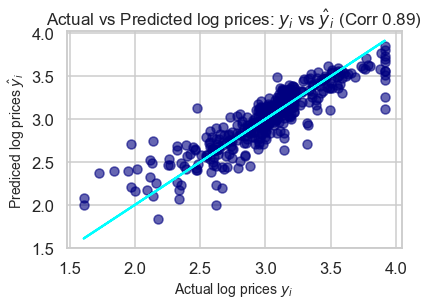

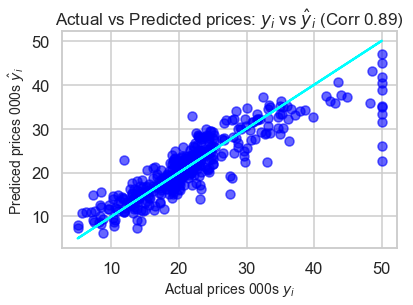

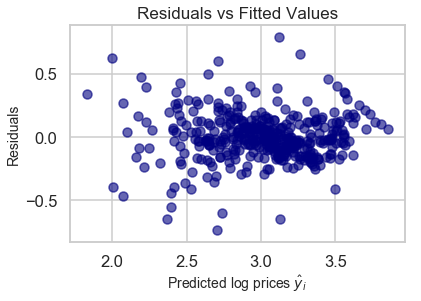

In [168]:
# Modified model: transformed using log prices and simplified 
#(droping two featurs INDUS,AGE )

price = np.log(df['PRICE'])
features = df.drop(['PRICE','INDUS','AGE'],axis=1)

X_train, X_test, y_train, y_test = train_test_split(
    features, price, test_size=0.2, random_state=10)

# Using stats model

X_incl_const = sm.add_constant(X_train)
model = sm.OLS(y_train,X_incl_const)
results = model.fit()


# Residuals 
# resuiduals = y_train - results.fittedvalues
# results.resid

# Graph of Axtual vs. Predicted prices

corr = round(y_train.corr(results.fittedvalues),2)

plt.scatter(x=y_train, y=results.fittedvalues, c='navy', alpha=0.6)
plt.plot(y_train, y_train, color='cyan')

plt.xlabel('Actual log prices $y _i$', fontsize=14)
plt.ylabel('Prediced log prices $\hat y _i$', fontsize=14)
plt.title(f'Actual vs Predicted log prices: $y _i$ vs $\hat y_i$ (Corr {corr})', fontsize=17)

plt.show()

plt.scatter(x=np.e**y_train, y=np.e**results.fittedvalues, c='blue', alpha=0.6)
plt.plot(np.e**y_train, np.e**y_train, color='cyan')

plt.xlabel('Actual prices 000s $y _i$', fontsize=14)
plt.ylabel('Prediced prices 000s $\hat y _i$', fontsize=14)
plt.title(f'Actual vs Predicted prices: $y _i$ vs $\hat y_i$ (Corr {corr})', fontsize=17)

plt.show()

# Residuals vs Predicted values

plt.scatter(x=results.fittedvalues, y=results.resid, c='navy', alpha=0.6)

plt.xlabel('Predicted log prices $\hat y _i$', fontsize=14)
plt.ylabel('Residuals', fontsize=14)
plt.title('Residuals vs Fitted Values', fontsize=17)

plt.show()

# Mean Squared Error & R-Squared
reduced_log_mse = round(results.mse_resid, 3)
reduced_log_rsquared = round(results.rsquared, 3)

C:\Users\AI\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


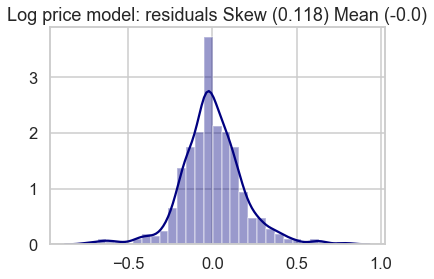

In [169]:
# Distribution of Residuals (log prices) - checking for normality
resid_mean = round(results.resid.mean(), 3)
resid_skew = round(results.resid.skew(), 3)

sns.distplot(results.resid, color='navy')
plt.title(f'Log price model: residuals Skew ({resid_skew}) Mean ({resid_mean})')
plt.show()

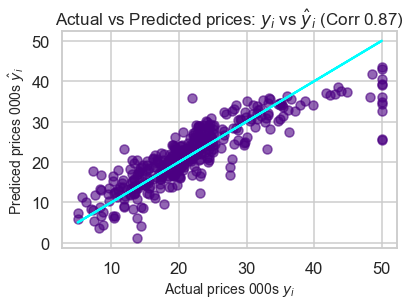

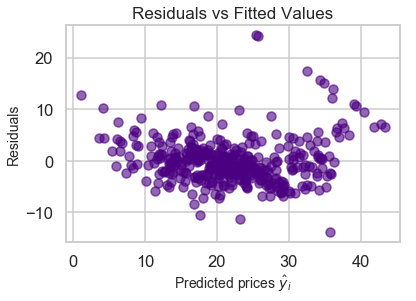

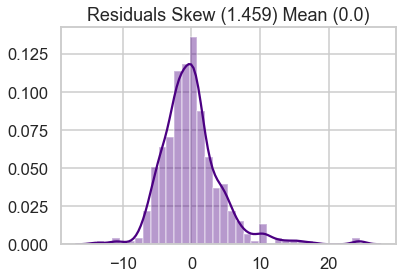

In [171]:
# Original model: normal prices & all features
prices = df['PRICE']
features = df.drop(['PRICE'], axis=1)

X_train, X_test, y_train, y_test = train_test_split(features, prices, 
                                                    test_size=0.2, random_state=10)

X_incl_const = sm.add_constant(X_train)
model = sm.OLS(y_train, X_incl_const)
results = model.fit()

# Graph of Actual vs. Predicted Prices
corr = round(y_train.corr(results.fittedvalues), 2)
plt.scatter(x=y_train, y=results.fittedvalues, c='indigo', alpha=0.6)
plt.plot(y_train, y_train, color='cyan')

plt.xlabel('Actual prices 000s $y _i$', fontsize=14)
plt.ylabel('Prediced prices 000s $\hat y _i$', fontsize=14)
plt.title(f'Actual vs Predicted prices: $y _i$ vs $\hat y_i$ (Corr {corr})', fontsize=17)

plt.show()

# Residuals vs Predicted values
plt.scatter(x=results.fittedvalues, y=results.resid, c='indigo', alpha=0.6)

plt.xlabel('Predicted prices $\hat y _i$', fontsize=14)
plt.ylabel('Residuals', fontsize=14)
plt.title('Residuals vs Fitted Values', fontsize=17)

plt.show()

# Residual Distribution Chart
resid_mean = round(results.resid.mean(), 3)
resid_skew = round(results.resid.skew(), 3)

sns.distplot(results.resid, color='indigo')
plt.title(f'Residuals Skew ({resid_skew}) Mean ({resid_mean})')
plt.show()

# Mean Squared Error & R-Squared
full_normal_mse = round(results.mse_resid, 3)
full_normal_rsquared = round(results.rsquared, 3)

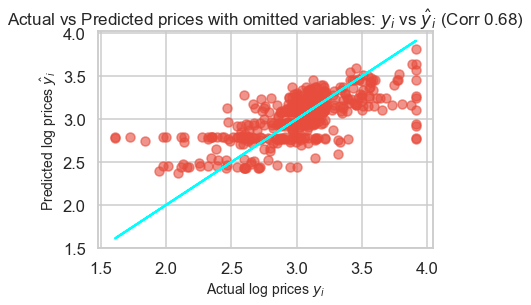

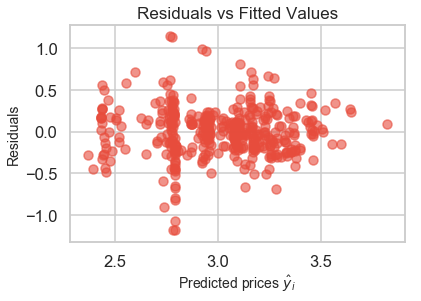

In [173]:
# Model Omitting Key Features using log prices
prices = np.log(df['PRICE'])
features = df.drop(['PRICE', 'INDUS', 'AGE', 'LSTAT', 'RM', 'NOX', 'CRIM'], axis=1)

X_train, X_test, y_train, y_test = train_test_split(features, prices, 
                                                    test_size=0.2, random_state=10)

X_incl_const = sm.add_constant(X_train)
model = sm.OLS(y_train, X_incl_const)
results = model.fit()

# Graph of Actual vs. Predicted Prices
corr = round(y_train.corr(results.fittedvalues), 2)
plt.scatter(x=y_train, y=results.fittedvalues, c='#e74c3c', alpha=0.6)
plt.plot(y_train, y_train, color='cyan')

plt.xlabel('Actual log prices $y _i$', fontsize=14)
plt.ylabel('Predicted log prices $\hat y _i$', fontsize=14)
plt.title(f'Actual vs Predicted prices with omitted variables: $y _i$ vs $\hat y_i$ (Corr {corr})', fontsize=17)

plt.show()

# Residuals vs Predicted values
plt.scatter(x=results.fittedvalues, y=results.resid, c='#e74c3c', alpha=0.6)

plt.xlabel('Predicted prices $\hat y _i$', fontsize=14)
plt.ylabel('Residuals', fontsize=14)
plt.title('Residuals vs Fitted Values', fontsize=17)

plt.show()

# Mean Squared Error & R-Squared
omitted_var_mse = round(results.mse_resid, 3)
omitted_var_rsquared = round(results.rsquared, 3)

In [174]:
pd.DataFrame({'R-Squared': [reduced_log_rsquared, full_normal_rsquared, omitted_var_rsquared],
             'MSE': [reduced_log_mse, full_normal_mse, omitted_var_mse], 
             'RMSE': np.sqrt([reduced_log_mse, full_normal_mse, omitted_var_mse])}, 
            index=['Reduced Log Model', 'Full Normal Price Model', 'Omitted Var Model'])

,R-Squared,MSE,RMSE
Reduced Log Model,0.792,0.035,0.187083
Full Normal Price Model,0.750,19.921,4.463295
Omitted Var Model,0.460,0.090,0.300000


In [175]:
# Challenge: Our estimate for a house price is $30,000. Calculate the upper and lower bound
# for a 95% prediction interval using the reduced log model

print('1 s.d. in log prices is', np.sqrt(reduced_log_mse))
print('2 s.d. in log prices is', 2*np.sqrt(reduced_log_mse))

upper_bound = np.log(30) + 2*np.sqrt(reduced_log_mse)
print('The upper bound in log prices for a 95% prediction interval is ', upper_bound)
print('The upper bound in normal prices is $', np.e**upper_bound * 1000)

lower_bound = np.log(30) - 2*np.sqrt(reduced_log_mse)
print('The lower bound in log prices for a 95% prediction interval is ', lower_bound)
print('The lower bound in normal prices is $', np.e**lower_bound * 1000)

1 s.d. in log prices is 0.18708286933869708
2 s.d. in log prices is 0.37416573867739417
The upper bound in log prices for a 95% prediction interval is  3.7753631203395495
The upper bound in normal prices is $ 43613.34233239937
The lower bound in log prices for a 95% prediction interval is  3.0270316429847615
The lower bound in normal prices is $ 20635.886906824155


In [176]:
30000 + np.e**(2*np.sqrt(reduced_log_mse)) * 1000
# Wrong! Add first. Transform afterwards. 

31453.778077746647